In [1]:
#Author(s): Jose Torres-Vargas
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm, sklearn.model_selection


plt.rcParams['figure.figsize'] = (17, 5)


# Tracks

In [4]:
tracks = pd.read_pickle('../Data/tracks.pkl')

In [5]:
tracks

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   
...           ...                  ...                  ...      ...   
155316          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155317          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155318          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155319          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155320          0  2017-03-26 16:22:18  2017-03-26 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
3                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
20               2      4          <p> "spiritual songs" from Nicky Cook</p>   
...            ...    ...                                                ...   
155316           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155317           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155318           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155319           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155320           1  22906                                                NaN   

                               \
         listens     producer   
track_id                        
2           6073          NaN   
3           6073          NaN   
5           6073          NaN   
10         47632          NaN   
20          2710          NaN   
...          ...          ...   
155316      1506  Monty Hall    
155317      1506  Monty Hall    
155318      1506  Monty Hall    
155319      1506  Monty Hall    
155320      7481          NaN   

                                                             ...       track  \
                                                       tags  ... information   
track_id                                                     ...               
2                                                        []  ...         NaN   
3                                                        []  ...         NaN   
5                                                        []  ...         NaN   
10                                                       []  ...         NaN   
20                                                       []  ...         NaN   
...                                                     ...  ...         ...   
155316                                                   []  ...         NaN   
155317                                                   []  ...         NaN   
155318                                                   []  ...         NaN   
155319                                                   []  ...         NaN   
155320    ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
3            1470            en   
5            1933            en   
10          54881            en   
20            978            en   
...           ... 

# per-track

In [3]:
tracks['track'].head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


# per-album

In [4]:
tracks['album'].head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


# Per-Artist

In [7]:
#per-artist
df = tracks['artist']

In [8]:
df

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
10,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN
20,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155316,NaN,NaN,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,['spowder'],https://spowder.bandcamp.com/,NaN
155317,NaN,NaN,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,['spowder'],https://spowder.bandcamp.com/,NaN
155318,NaN,NaN,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,['spowder'],https://spowder.bandcamp.com/,NaN


# Per-Set

In [9]:
#per-set
tracks['set'].head()

,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


# Genres

In [11]:
genres = pd.read_pickle('../Data/genres.pkl')

#Displaying genres
print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)


16 top-level genres


,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
17,12706,0,Folk,17
21,8389,0,Hip-Hop,21
2,5271,0,International,2
4,4126,0,Jazz,4


# Features

In [13]:
features = pd.read_pickle('../Data/features.pkl')

In [14]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [16]:
#looking at a specific category
features['chroma_cens']

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20         -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
...              ...       ...       ...       ...       ...       ...   
155316     -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317     -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318      0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319     -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   
155320      0.489665  1.862421  0.854461 -0.103666 -0.249835  0.360283   

statistics                                          ...       std            \
number            07        08        09        10  ...        03        04   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.092350  0.077237   
3           1.366848  1.054094  0.108103  0.619185  ...  0.102759  0.090946   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.100257  0.072991   
10          1.770694  1.604566  0.521217  1.982386  ...  0.056647  0.118345   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.147100  0.112692   
...              ...       ...       ...       ...  ...       ...       ...   
155316     -0.237794  5.695442  0.830353  1.951819  ...  0.145356  0.106066   
155317     -0.628103 -0.082687 -0.229483 -0.492753  ...  0.178551  0.127296   
155318      1.713526  1.418444  1.325197  0.120333  ...  0.149176  0.098879   
155319     -0.780860  0.626281 -0.630938 -0.787229  ...  0.096664  0.129895   
155320     -0.366701  0.033578 -0.834606 -1.154845  ...  0.130722  0.092180   

statistics                                                              \
number            05        06        07        08        09        10   
track_id                                                                 
2           0.074284  0.077322  0.077279  0.068588  0.079606  0.085470   
3           0.075314  0.102431  0.083249  0.100854  0.089236  0.083384   
5           0.071584  0.076366  0.126677  0.131232  0.108912  0.101764   
10          0.080761  0.071630  0.083277  0.069644  0.104290  0.077502   
20          0.130581  0.126656  0.146840  0.165409  0.112400  0.157284   
...              ...       ...       ...       ...       ...       ...   
155316      0.171739  0.136452  0.126534  0.090267  0.093647  0.124365   
155317      0.165922  0.142604  0.123660  0.102164  0.109767  0.159251   
155318      0.134045  0.103426  0.089903  0.083497  0.084681  0.121973   
155319      0.093302  0.151940  0.115668  0.094326  0.120498  0.106149   
155320      0.137882  0.110525  0.111855  0.128800  0.116368  0.166231   

statistics                      
number            11        12  
track_id                        
2           0.085498  0.098219  
3           0.079806  0.071072  
5           0.089526  0.088002  
10          0.074136  0.090781  
20          0.178552  0.137254  
...              ...       ...  
155316      0.095462  0.120004  
155317      0.110519  0.184411  
155318      0.090587  0.111838  
155319      0.103376  0.103931  
155320      0.106998  0.109930  

[106574 rows x 84 columns]

# Echonest

In [21]:
echonest = pd.read_pickle('../Data/echonest.pkl')
echonest

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                                                          ...  \
                                           metadata                       ...   
         speechiness    tempo   valence  album_date           album_name  ...   
track_id                                                                  ...   
2           0.159310  165.922  0.576661         NaN                  NaN  ...   
3           0.461818  126.957  0.269240         NaN                  NaN  ...   
5           0.124595  100.260  0.621661         NaN                  NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11    Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                  NaN  ...   
...              ...      ...       ...         ...                  ...  ...   
124857      0.082550  141.332  0.890461         NaN                  NaN  ...   
124862      0.074001  101.975  0.476845         NaN                  NaN  ...   
124863      0.051517  129.996  0.496667         NaN                  NaN  ...   
124864      0.033388  142.009  0.569274         NaN                  NaN  ...   
124911      0.065189  119.965  0.204652  2009-10-23  Suicide Beauty Girl  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   
...                    ...        ...       ...       ...       ...      ...   
124857           -1.721207   4.686078  0.213789  0.208800  0.007911  0.06395   
124862           -0.647897   1.282306  0.214586  0.181860  0.011247  0.06240   
124863           -0.771613   1.623510  0.180471  0.128185  0.010103  0.06222   
124864           -2.054143   7.927149  0.250178  0.219205  0.014851  0.06390   
124911           -0.215639  -0.584081  0.603893  0.505940  0.608585  0.06830   

                                                      
                                                      
                220       221        222         223  
track_id                                              
2          3.676960   3.61288  13.316690  262.929749  
3          6.082770   6.01864  16.673548  325.581085  
5          5.926490   5.86635  16.013849  356.755737  
10         8.414010   8.33319  21.317064  483.403809  
13

## Audio Features

In [12]:
echonest.iloc[:, echonest.columns.get_level_values(1) == 'audio_features'].head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                         
                                         
         speechiness    tempo   valence  
track_id                                 
2           0.159310  165.922  0.576661  
3           0.461818  126.957  0.269240  
5           0.124595  100.260  0.621661  
10          0.032985  111.562  0.963590  
134         0.525519  114.290  0.894072

## Meta Data

In [13]:
echonest.iloc[:, echonest.columns.get_level_values(1) == 'metadata'].head()

echonest                                                           \
            metadata                                                            
          album_date         album_name artist_latitude       artist_location   
track_id                                                                        
2                NaN                NaN         32.6783           Georgia, US   
3                NaN                NaN         32.6783           Georgia, US   
5                NaN                NaN         32.6783           Georgia, US   
10        2008-03-11  Constant Hitmaker         39.9523  Philadelphia, PA, US   
134              NaN                NaN         32.6783           Georgia, US   

                                                             
                                                             
         artist_longitude artist_name               release  
track_id                                                     
2                -83.2230        AWOL  AWOL - A Way Of Life  
3                -83.2230        AWOL  AWOL - A Way Of Life  
5                -83.2230        AWOL  AWOL - A Way Of Life  
10               -75.1624   Kurt Vile     Constant Hitmaker  
134              -83.2230        AWOL  AWOL - A Way Of Life

## Social Features

In [14]:
echonest.iloc[:, echonest.columns.get_level_values(1) == 'social_features'].head()

echonest                                                     \
          social_features                                                      
         artist_discovery artist_familiarity artist_hotttnesss song_currency   
track_id                                                                       
2                0.388990           0.386740          0.406370      0.000000   
3                0.388990           0.386740          0.406370      0.000000   
5                0.388990           0.386740          0.406370      0.000000   
10               0.557339           0.614272          0.798387      0.005158   
134              0.388990           0.386740          0.406370      0.000000   

                          
                          
         song_hotttnesss  
track_id                  
2               0.000000  
3               0.000000  
5               0.000000  
10              0.354516  
134             0.000000

## Ranks

In [15]:
echonest.iloc[:, echonest.columns.get_level_values(1) == 'ranks'].head()

echonest                                                 \
                         ranks                                                  
         artist_discovery_rank artist_familiarity_rank artist_hotttnesss_rank   
track_id                                                                        
2                          NaN                     NaN                    NaN   
3                          NaN                     NaN                    NaN   
5                          NaN                     NaN                    NaN   
10                      2635.0                  2544.0                  397.0   
134                        NaN                     NaN                    NaN   

                                                  
                                                  
         song_currency_rank song_hotttnesss_rank  
track_id                                          
2                       NaN                  NaN  
3                       NaN                  NaN  
5                       NaN                  NaN  
10                 115691.0              67609.0  
134                     NaN                  NaN

## Temporal Features

In [16]:
echonest.iloc[:, echonest.columns.get_level_values(1) == 'temporal_features'].head()

echonest                                                    \
         temporal_features                                                     
                       000       001       002       003       004       005   
track_id                                                                       
2                 0.877233  0.588911  0.354243  0.295090  0.298413  0.309430   
3                 0.534429  0.537414  0.443299  0.390879  0.344573  0.366448   
5                 0.548093  0.720192  0.389257  0.344934  0.361300  0.402543   
10                0.311404  0.711402  0.321914  0.500601  0.250963  0.321316   
134               0.610849  0.569169  0.428494  0.345796  0.376920  0.460590   

                                                  ...                       \
                                                  ...                        
               006       007       008       009  ...       214        215   
track_id                                          ...                        
2         0.304496  0.334579  0.249495  0.259656  ... -1.992303   6.805694   
3         0.419455  0.747766  0.460901  0.392379  ... -1.582331   8.889308   
5         0.434044  0.388137  0.512487  0.525755  ... -2.288358  11.527109   
10        0.734250  0.325188  0.373012  0.235840  ... -3.662988  21.508228   
134       0.401371  0.449900  0.428946  0.446736  ... -1.452696   2.356398   

                                                                     \
                                                                      
               216       217       218      219       220       221   
track_id                                                              
2         0.233070  0.192880  0.027455  0.06408   3.67696   3.61288   
3         0.258464  0.220905  0.081368  0.06413   6.08277   6.01864   
5         0.256821  0.237820  0.060122  0.06014   5.92649   5.86635   
10        0.283352  0.267070  0.125704  0.08082   8.41401   8.33319   
134       0.234686  0.199550  0.149332  0.06440  11.26707  11.20267   

                                 
                                 
                222         223  
track_id                         
2         13.316690  262.929749  
3         16.673548  325.581085  
5         16.013849  356.755737  
10        21.317064  483.403809  
134       26.454180  751.147705  

[5 rows x 224 columns]

In [24]:
chroma_cens = features.iloc[:,features.columns.get_level_values(0)=='chroma_cens']
cmean = chroma_cens.iloc[:,chroma_cens.columns.get_level_values(1) == 'mean'];
sets = tracks['set']
#have the means for chroma_cens


subset = sets.iloc[:,sets.columns.get_level_values(0) == 'subset']
small = subset.loc[subset['subset'] == 'small']
#"get" small subset df

In [25]:
#get chroma mean features for small subset only
cmean = cmean[cmean.index.isin(small.index)]
cmean_df = cmean.copy()
cmean_df



#get info for small subset
tracks_small = tracks[tracks.index.isin(small.index)]
tracks_sdf = tracks_small.copy()
tsdf = tracks_sdf['track']

#adding genre to dataframe
cmean_df['genre'] = tsdf['genre_top']

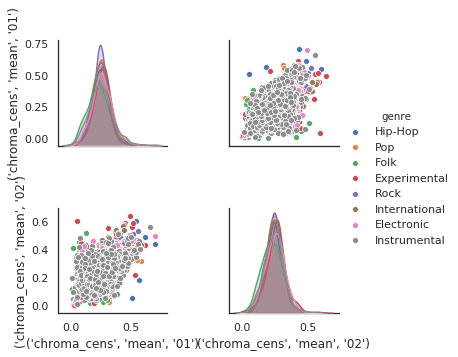

In [26]:
sns.set(style='white', color_codes=True)
sns.pairplot(cmean_df, vars=[('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean','02')], hue='genre')

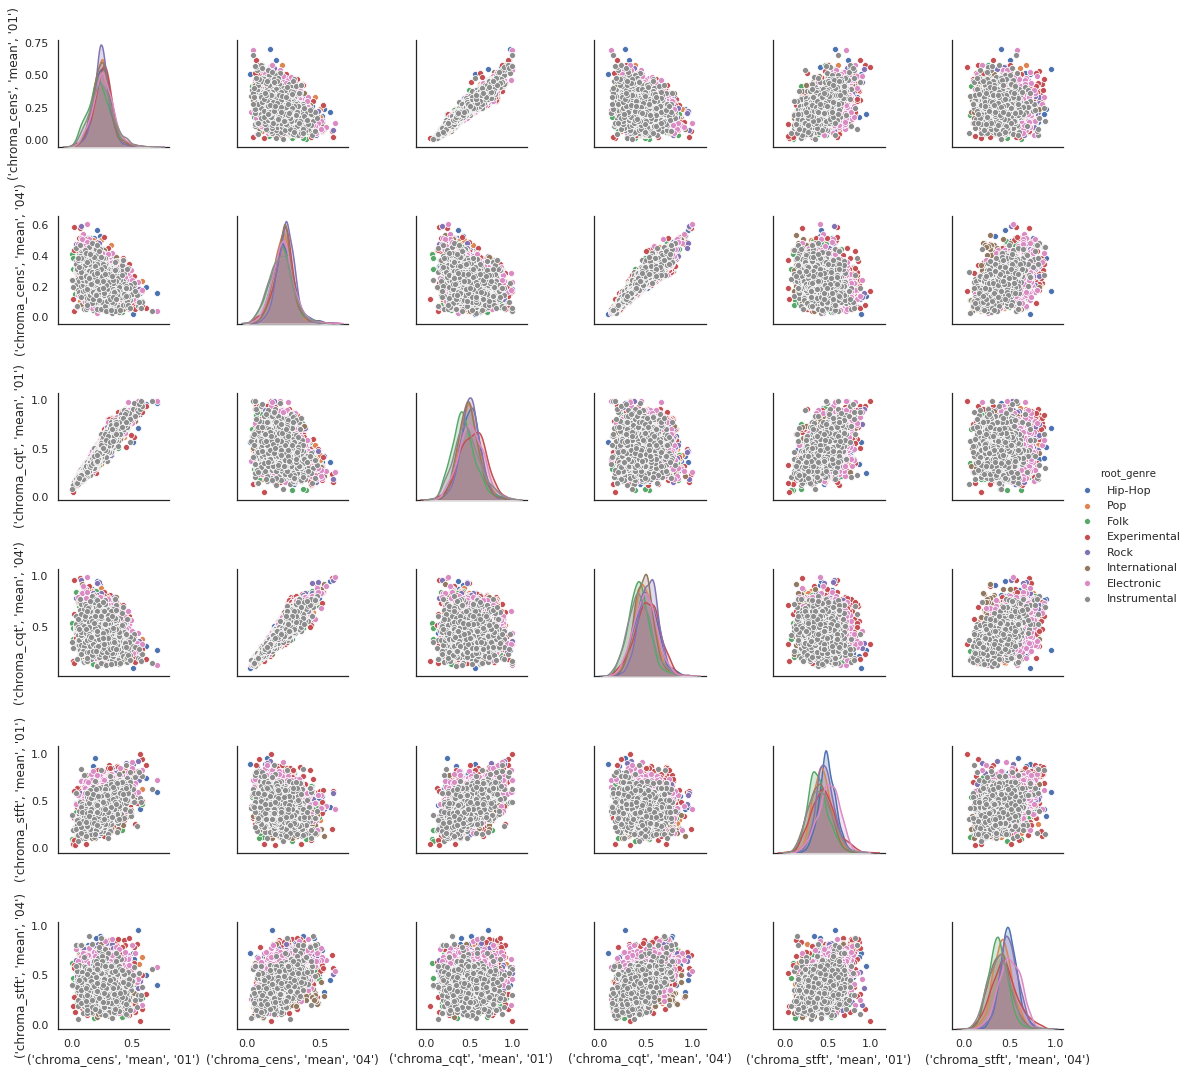

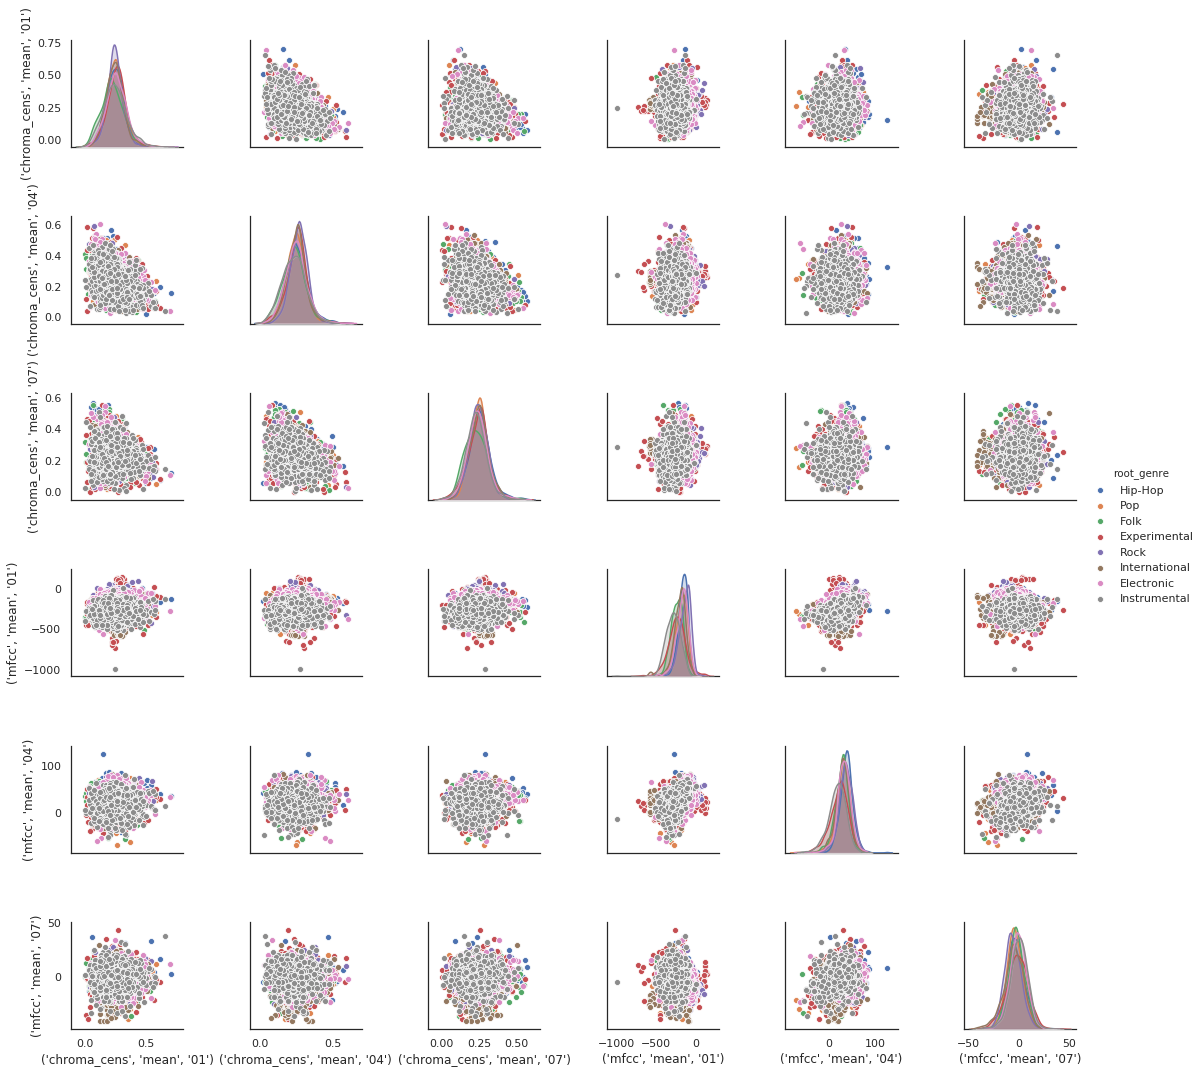

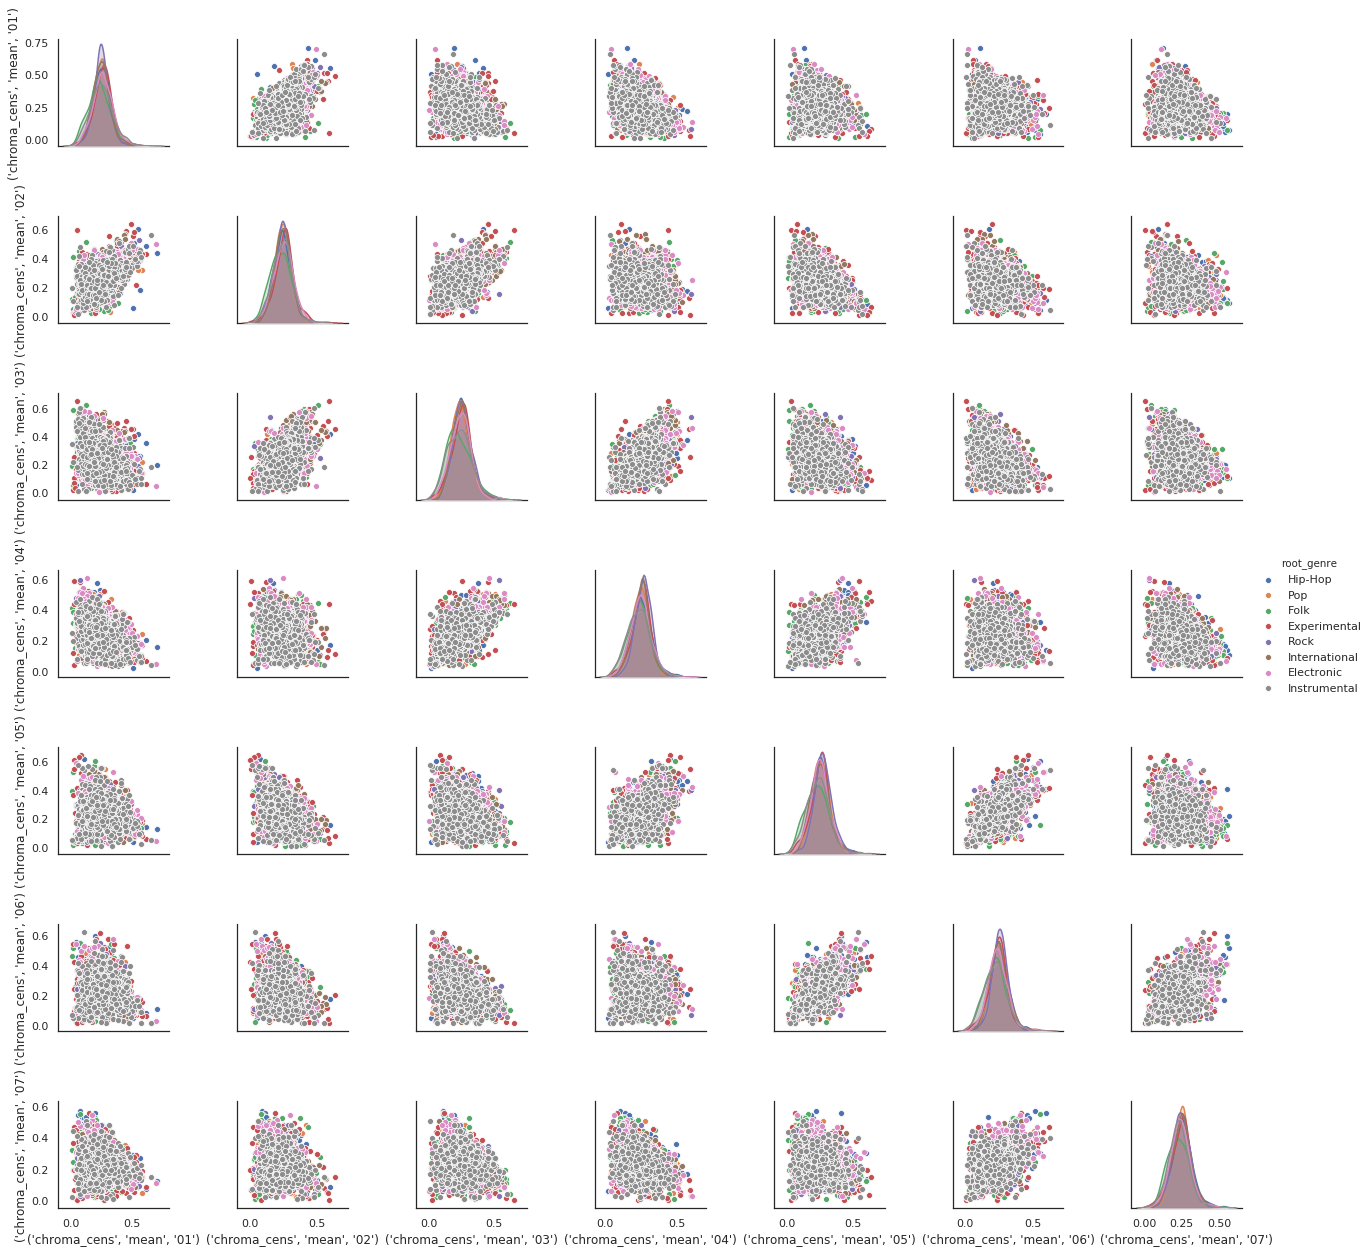

In [27]:
#chroma energy normalized
chroma_cens = features.iloc[:,features.columns.get_level_values(0)=='chroma_cens']
#logarithmically spaced frequency axis
chroma_cqt = features.iloc[:,features.columns.get_level_values(0) == 'chroma_cqt']

chroma_stft = features.iloc[:,features.columns.get_level_values(0) == 'chroma_stft']
mfcc = features.iloc[:,features.columns.get_level_values(0) == 'mfcc']
rmse = features.iloc[:, features.columns.get_level_values(0) == 'rmse']
tonnetz = features.iloc[:,features.columns.get_level_values(0) == 'tonnetz']

#"get" small subset df 
subset = sets.iloc[:,sets.columns.get_level_values(0) == 'subset']
small = subset.loc[subset['subset'] == 'small']

#use means only
ccens_mean = chroma_cens.iloc[:,chroma_cens.columns.get_level_values(1) == 'mean'];
ccqt_mean = chroma_cqt.iloc[:,chroma_cqt.columns.get_level_values(1) == 'mean']
cstft_mean = chroma_stft.iloc[:, chroma_stft.columns.get_level_values(1) == 'mean']
mfcc_mean = mfcc.iloc[:, mfcc.columns.get_level_values(1) == 'mean']
tonnetz_mean = tonnetz.iloc[:, tonnetz.columns.get_level_values(1) == 'mean']
tonnetz_mean = tonnetz_mean.iloc[:, tonnetz_mean.columns.get_level_values(2) == '06']

#combine chroma
chroma_mean = ccens_mean.join(ccqt_mean, lsuffix='_caller', rsuffix='_other')
chroma_mean = chroma_mean.join(cstft_mean, lsuffix='_caller', rsuffix='_other')
chroma_mean = chroma_mean[chroma_mean.index.isin(small.index)]
chroma_mean['root_genre'] = tsdf['genre_top']
sns.set(style='white', color_codes=True)
#just looking at chroma
sns.pairplot(chroma_mean, vars=[('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean', '04'), ('chroma_cqt', 'mean', '01'), ('chroma_cqt', 'mean', '04'), ('chroma_stft', 'mean', '01'), ('chroma_stft', 'mean', '04')], hue='root_genre')

mfcc_mean = mfcc.iloc[:, mfcc.columns.get_level_values(1) == 'mean']
#get small subset
mfcc_mean = mfcc_mean[mfcc_mean.index.isin(small.index)]
feat_df = chroma_mean.copy()
feat_df = feat_df.join(mfcc_mean, lsuffix='_caller', rsuffix='_other')

#chroma and mfcc
sns.pairplot(feat_df, vars=[('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean', '04'), ('chroma_cens', 'mean', '07'), ('mfcc', 'mean', '01'), ('mfcc', 'mean', '04'), ('mfcc', 'mean', '07')], hue='root_genre')

#just chroma
sns.pairplot(chroma_mean, vars=[('chroma_cens', 'mean', '01'), ('chroma_cens', 'mean', '02'), ('chroma_cens', 'mean', '03'), ('chroma_cens', 'mean', '04'), ('chroma_cens', 'mean', '05'), ('chroma_cens', 'mean', '06'), ('chroma_cens', 'mean', '07')], hue='root_genre')




In [ ]:
#Testing out makeKfold function

def makeKfold(df, k):
    kf = skl.model_selection.KFold(n_splits = k, shuffle = True)
    df_collection = {}
    i = 0
    for train_index, test_index in kf.split(df):
        df_collection[i,"training"] = df.iloc[train_index]
        df_collection[i,"testing"] = df.iloc[test_index]
        i = i + 1
    return df_collection